In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
img = mpimg.imread('1.jpg')
print(img)

[[[ 69  88   7]
  [ 64  81   1]
  [ 61  78   0]
  ...
  [ 26  54   5]
  [ 25  53   4]
  [ 24  52   3]]

 [[ 74  93  12]
  [ 66  85   4]
  [ 61  78   0]
  ...
  [ 21  48   3]
  [ 20  47   2]
  [ 20  47   2]]

 [[ 82 100  24]
  [ 69  87  11]
  [ 60  78   2]
  ...
  [ 16  41   1]
  [ 15  40   0]
  [ 15  40   0]]

 ...

 [[233 234 236]
  [232 233 235]
  [233 234 236]
  ...
  [220 220 222]
  [221 221 223]
  [231 231 233]]

 [[231 232 234]
  [230 231 233]
  [231 232 234]
  ...
  [216 216 218]
  [216 216 218]
  [225 225 227]]

 [[229 230 232]
  [228 229 231]
  [229 230 232]
  ...
  [212 212 214]
  [210 210 212]
  [217 217 219]]]


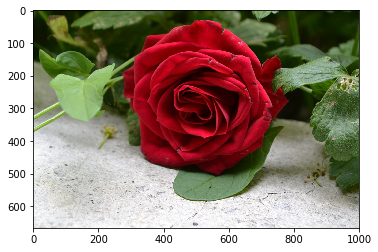

In [7]:
imgplot = plt.imshow(img)

In [10]:
img.shape

(667, 1000, 3)

In [12]:
img.dtype

dtype('uint8')

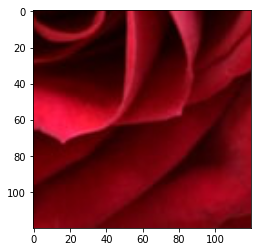

In [16]:
plt.imshow(img[320:440, 510:630], cmap=plt.cm.gray, interpolation='bilinear')   

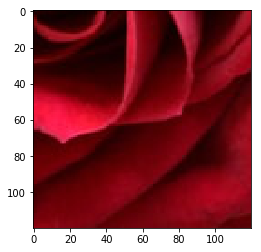

In [17]:
plt.imshow(img[320:440, 510:630], cmap=plt.cm.gray, interpolation='nearest') 

In [20]:
img[10:13,20:23]

array([[[44, 74,  2],
        [51, 79,  2],
        [56, 85,  1]],

       [[38, 67,  1],
        [44, 74,  2],
        [52, 80,  3]],

       [[33, 63,  1],
        [40, 69,  2],
        [48, 76,  1]]], dtype=uint8)

In [32]:
lx, ly, z = img.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
img[mask] = 0
# Fancy indexing
img[range(400), range(400)] = 255

ValueError: assignment destination is read-only

TypeError: Input must be a 2D array.

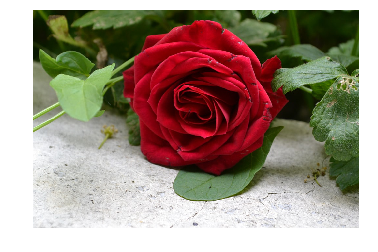

In [24]:
plt.imshow(img, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')
plt.contour(f, [50, 200])     

In [25]:
img.mean()

109.27703198400799

In [26]:
img.max()

255

In [27]:
img.min()

0

In [36]:
import scipy.ndimage as ndimage
lx, ly,z = img.shape
# Cropping
crop_face = img[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(img)
# rotation
rotate_face = ndimage.rotate(img, 45)
rotate_face_noreshape = ndimage.rotate(img, 45, reshape=False)

In [37]:
rotate_face

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

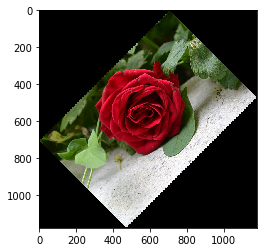

In [39]:
plt.imshow(rotate_face)

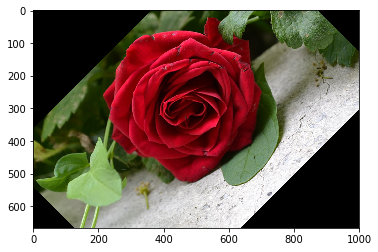

In [40]:
plt.imshow(rotate_face_noreshape)

In [43]:
blurred = ndimage.gaussian_filter(img, sigma=3)
very_blurred = ndimage.gaussian_filter(img, sigma=5)

In [44]:
blurred

array([[[ 51,  51,  50],
        [ 50,  50,  49],
        [ 48,  48,  48],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       [[ 51,  51,  50],
        [ 50,  50,  50],
        [ 48,  48,  48],
        ...,
        [ 18,  18,  18],
        [ 19,  19,  18],
        [ 19,  19,  18]],

       [[ 51,  51,  51],
        [ 50,  50,  50],
        [ 48,  48,  48],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  17],
        [ 18,  18,  17]],

       ...,

       [[231, 231, 231],
        [231, 231, 231],
        [230, 230, 230],
        ...,
        [218, 218, 218],
        [218, 218, 219],
        [219, 219, 219]],

       [[231, 231, 231],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [217, 217, 218],
        [218, 218, 218],
        [218, 218, 219]],

       [[230, 230, 230],
        [230, 230, 230],
        [229, 229, 229],
        ...,
        [217, 217, 217],
        [218, 218, 218],
        [218, 218, 218]]

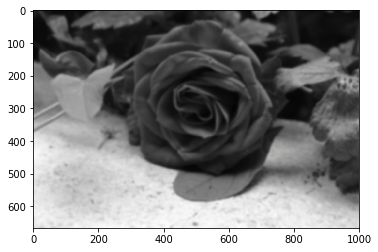

In [45]:
plt.imshow(blurred)

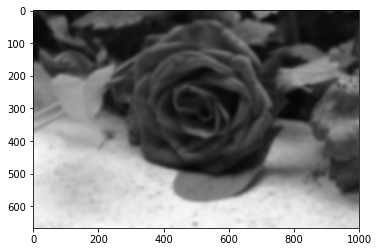

In [47]:
plt.imshow(very_blurred)

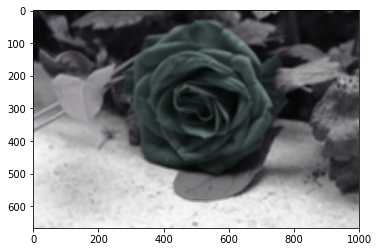

In [50]:
local_mean = ndimage.uniform_filter(img, size=11)
plt.imshow(local_mean)

In [51]:
filter_blurred_f = ndimage.gaussian_filter(blurred, 1)
alpha = 30
sharpened = blurred + alpha * (blurred - filter_blurred_f)

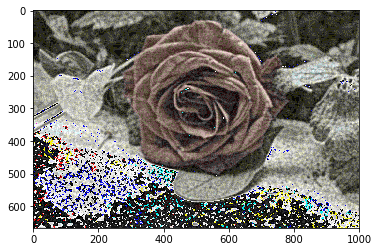

In [53]:
plt.imshow(sharpened)

In [54]:
f = img[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

In [61]:
gauss_denoised = ndimage.gaussian_filter(img, 2)

In [62]:
med_denoised = ndimage.median_filter(img, 3)


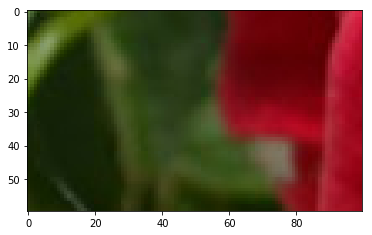

In [58]:
plt.imshow(f)

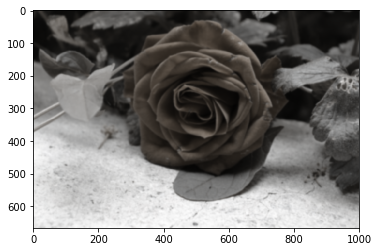

In [63]:
plt.imshow(gauss_denoised)

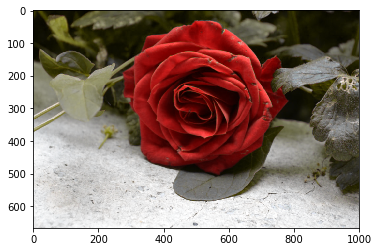

In [64]:
plt.imshow(med_denoised)

In [66]:
sx = ndimage.sobel(img, axis=0, mode='constant')
sy = ndimage.sobel(img, axis=1, mode='constant')
sob = np.hypot(sx, sy)